In [1]:
#data stuff
import pandas as pd

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction import text
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

#NLP
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import gensim

#other
from tqdm import tqdm_notebook
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

In [35]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
tweets_all = pd.read_csv('./Datasets/data_X_all_tweets')

In [5]:
all_text = " ".join(text for text in tweets_all['tweets']) 

In [58]:
newcolors = ['#FE2FFA', '#D106B8', '#A601A3', '#DE3C64', '#A600E7', '#0D0024', '#52000B', '#F9177E']
newcmp = ListedColormap(newcolors)

newcolors2 = ['#13C8FF', '#031297', '#33CAE3', '#2D98AD', '#0652C3', '#2115C8', '#021485', '#8699FF']
newcmp2 = ListedColormap(newcolors2)

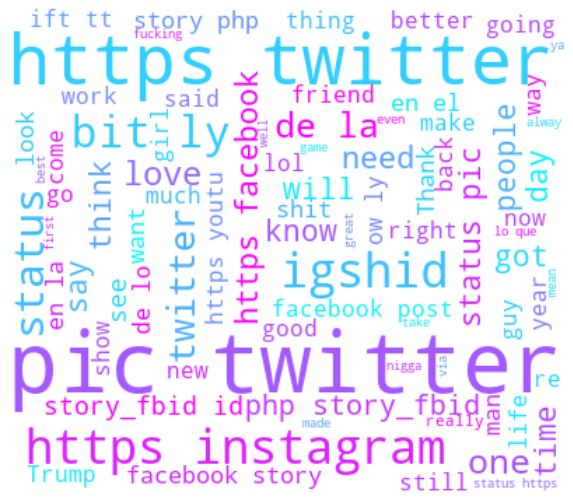

In [42]:
wordcloud = WordCloud(max_font_size=100, 
                      max_words=120, 
                      background_color="white",
                      prefer_horizontal=0.6,
                      width=400,
                      height=350,
                      mode='RGBA',
                      colormap='cool'
                     ).generate(all_text)
plt.figure(figsize= [15,9])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

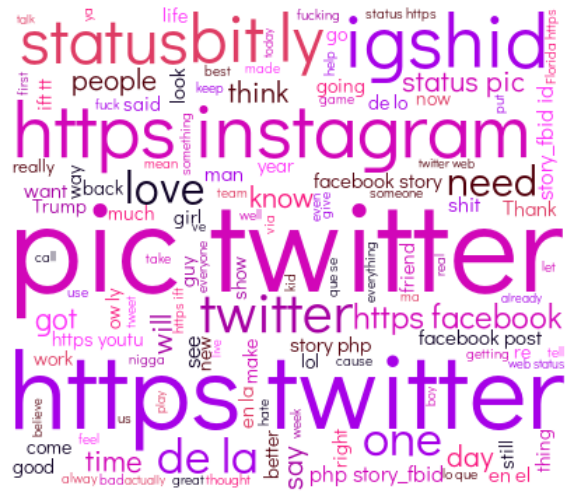

In [64]:
wordcloud = WordCloud(font_path='./font/didactgothic-regular.otf',
                      max_font_size=120, 
                      max_words=120, 
                      background_color="white",
                      prefer_horizontal=0.6,
                      width=400,
                      height=350,
                      mode='RGBA',
                      colormap=newcmp
                     ).generate(all_text)
plt.figure(figsize= [15,9])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
files = ['@TotalTrafficMIA',
         '@TrafficAlertSFL', '@nbc6', '@CBSMiami', '@wsvn', '@MiamiHerald', '@SunSentinel', '@miaminewsnow',
         '@BeachNewsAlerts', '@WPLGLocal10', 
       '@MiamiBeachPD', '@miamibeachnews', '@FLTurnpikeSFL']

In [12]:
datum = []

for filename in tqdm_notebook(files):
    data = pd.read_csv(f'Datasets/siteloop_{filename}.csv')
    data.drop(columns=['User','User_ID','Geo'], inplace = True)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date'] = data.assign(Date=data['Date'].dt.floor('H'))['Date']
    times = []
    times.append(data['Date'][0])

    for i in data.index:
        time = data['Date'][i]
        if time != times[len(times)-1]:
            times.append(time)

    dic = {'time': [], f'{filename}': []}

    for hour in times:
        total = ''
        tweets = list(data[data['Date'] == hour]['Tweet'])
        for twit in tweets:
            total += str(twit)
        dic['time'].append(hour)
        dic[f'{filename}'].append(total)
    exec(f'data_{filename[1:]} = pd.DataFrame.from_dict(dic)')
    
    exec(f'data_{filename[1:]}.set_index("time", inplace=True)')
    exec(f'data_{filename[1:]}.sort_index(inplace=True)')
    
    exec(f'datum.append(data_{filename[1:]})')
df = pd.concat(datum, axis=1)
df.fillna('', inplace=True)

In [13]:
df['tweets'] = df['@TotalTrafficMIA'] + df['@TrafficAlertSFL'] + df['@nbc6'] + \
df['@CBSMiami'] + df['@wsvn'] + df['@MiamiHerald'] + df['@SunSentinel'] + \
df['@miaminewsnow'] + df['@BeachNewsAlerts'] + df['@WPLGLocal10'] + df['@MiamiBeachPD'] + \
df['@miamibeachnews'] + df['@FLTurnpikeSFL']

In [14]:
all_news_text = " ".join(text for text in df['tweets']) 

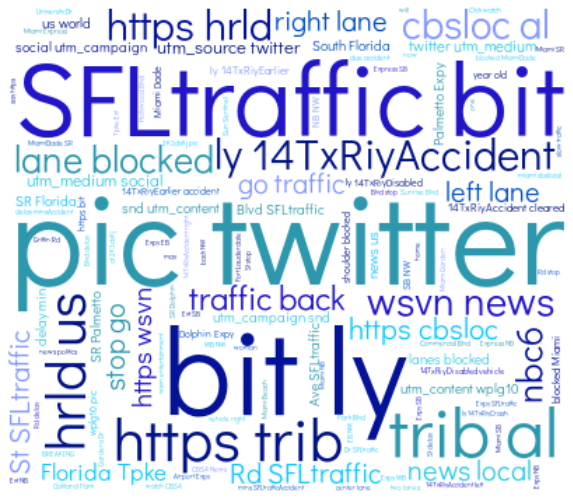

In [63]:
wordcloud = WordCloud(font_path='./font/didactgothic-regular.otf',
                      max_font_size=120, 
                      max_words=120, 
                      background_color="white",
                      prefer_horizontal=0.6,
                      width=400,
                      height=350,
                      mode='RGBA',
                      colormap=newcmp2
                     ).generate(all_news_text)
plt.figure(figsize= [15,9])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()